         ABUSIVE Kata_Sensor
0           alay    disensor
1          ampas    disensor
2           buta    disensor
3        keparat    disensor
4         anjing    disensor
..           ...         ...
120        rezim    disensor
121        sange    disensor
122       serbet    disensor
123        sipit    disensor
124  transgender    disensor

[125 rows x 2 columns]
                Tidak baku                               Baku
0      anakjakartaasikasik           anak jakarta asyik asyik
1             pakcikdahtua                  pak cik sudah tua
2           pakcikmudalagi                  pak cik muda lagi
3              t3tapjokowi                       tetap jokowi
4                       3x                          tiga kali
...                    ...                                ...
15162            mendikbud  menteri pendidikan dan kebudayaan
15163               mendag                menteri perdagangan
15164              menaker               menteri tenaga kerja
15165   

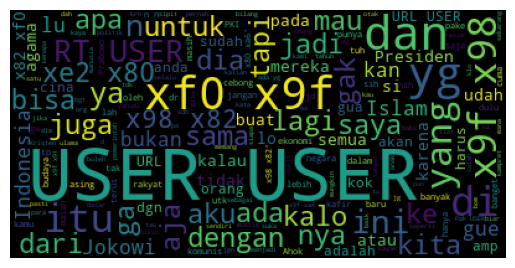

/var/folders/5k/kk312f8s19j54r260g2d6ss40000gn/T/ipykernel_7009/816246067.py:81: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = post_df.corr()


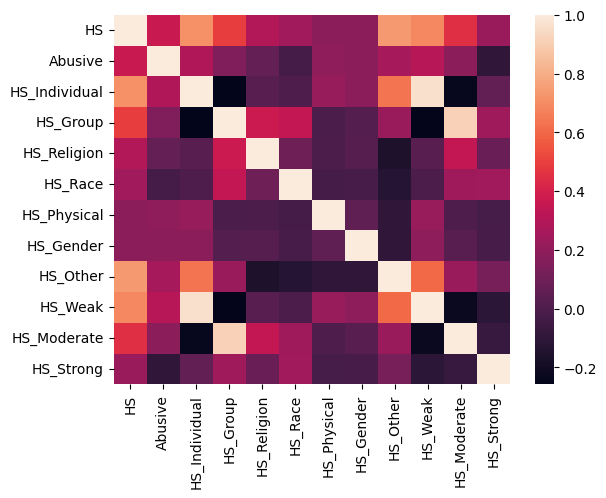

Tabel Berhasil Dibuat
 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [02/Oct/2023 23:03:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2023 23:03:16] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [02/Oct/2023 23:03:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2023 23:03:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [02/Oct/2023 23:03:19] "GET /docs/ HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2023 23:03:19] "GET /flasgger_static/swagger-ui-bundle.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Oct/2023 23:03:19] "GET /flasgger_static/lib/jquery.min.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Oct/2023 23:03:19] "GET /flasgger_static/swagger-ui-standalone-preset.js HTTP/1.1" 304 -
127.0.0.1 - - [02/Oct/2023 23:03:19] "GET /flasgger_static/swagger-ui.css HTTP/1.1" 304 -
127.0.0.1 - - [02/Oct/2023 23:03:19] "GET /docs.json HTTP/1.1" 200 -



Ini adalah kumpulan kata dari Tweet seteleh dicleansing


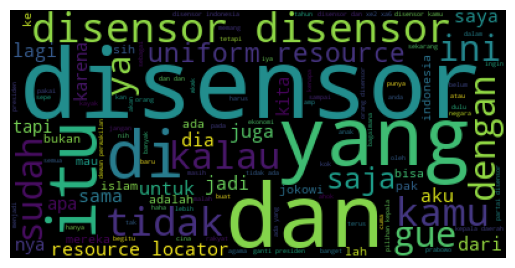

127.0.0.1 - - [02/Oct/2023 23:03:47] "POST /Upload%20User%20File HTTP/1.1" 200 -


In [ ]:
# IMPORT LIBRARIES FOR REGEX, PANDAS, NUMPY, SQLITE3, MATPLOTLIB, SEABORN, AND WARNINGS (TO IGNORE VISUALIZATION RESULT WARNING
import re
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import textwrap


# IMPORT LIBRARY FOR FLASK AND SWAGGER
from flask import Flask, jsonify, request
from flasgger import Swagger, LazyString, LazyJSONEncoder
from flasgger import swag_from
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


# DEFAULT FLASK AND SWAGGER DEFAULT SETTING
app = Flask(__name__)
app.json_encoder = LazyJSONEncoder
swagger_template = dict(
info = {
    'title': LazyString(lambda:'API Documentation for Data Analisys'),
    'version': LazyString(lambda: '1.0.0'),
    'description': LazyString(lambda: 'Dokumentasi API untuk Data Analisis'),
    },
    host = LazyString(lambda: request.host)
)
swagger_config = {
    "headers": [],
    "specs": [
        {
            "endpoint": 'docs',
            "route": '/docs.json',
        }
    ],
    "static_url_path": "/flasgger_static",
    "swagger_ui": True,
    "specs_route": "/docs/"
}
swagger = Swagger(app, template=swagger_template,             
                  config=swagger_config)

# IMPORT ABUSIVE.CSV AND NEW_KAMUSALAY.CSV TO PANDAS DATAFRAME (EACH)
df_abusive = pd.read_csv('abusive.csv', encoding='latin1')
df_abusive['Kata_Sensor']="disensor" #Inisiasi kata ganti untuk kata-kata yang kasar dengan kata "disensor"
df_abusive_map = dict(zip(df_abusive['ABUSIVE'],df_abusive['Kata_Sensor']))

print(df_abusive)

df_kamusalay = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
df_kamusalay = df_kamusalay.rename(columns={0:"Tidak baku",1:"Baku"})
df_kamusalay_map = dict(zip(df_kamusalay['Tidak baku'], df_kamusalay['Baku']))

print(df_kamusalay)
print("")

# CLEANSING DATA AWAL UNTUK MENGETAHUI DUPLIKASI DAN NILAI NaN
def initial_cleansing():
    post_df = pd.read_csv(r"/Users/ondom/myenv/data.csv",encoding='latin1')
    print("Jumlah Data Terduplikasi Saat Ini : " + str(post_df.duplicated().sum()))
    post_df=post_df.drop_duplicates()
    print("Jumlah Data Terduplikasi Sekarang Adalah : "+str(post_df.duplicated().sum()))
    print("Jumlah Elemen NaN Pada Data : "+str(post_df.isna().sum()))
    post_df.head()

    print("")
    text = "Ini adalah kumpulan kata dari Tweet sebelum dicleansing"
    print(text)
    text = ' '.join(post_df['Tweet'])
    # Membuat Word Cloud
    wordcloud = WordCloud().generate(text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    corr = post_df.corr()
    sns.heatmap(corr)
    plt.show()


initial_cleansing()



conn=sqlite3.connect('Database_Challange.db')
cursor=conn.cursor()
try:
        cursor.execute('''CREATE TABLE Kata_Kata (id INTEGER PRIMARY KEY AUTOINCREMENT, kata_sebelum_cleansing TEXT, kata_setelah_cleansing TEXT)''')
        print("Tabel Berhasil Dibuat")
except sqlite3.OperationalError:
        print("Tabel Telah Dibuat")
conn.commit()
conn.close()



# DEFINE ENDPOINTS: BASIC GET
@swag_from(r"/Users/ondom/myenv/hello_world.yml", methods=['GET'])
@app.route('/', methods=['GET'])
def hello_world():
    json_response = {
        'status_code': 200,
        'description': "Menyapa Hello World",
        'data': "Hello World",
    }
    response_data = jsonify(json_response)
    return response_data


# END POINT BAGIAN KEDUA UNTUK MASUKAN TEXT
@swag_from(r"/Users/ondom/myenv/text_processing.yml")
@app.route('/Input User Text',methods=['POST'])
def text_processing():
    global text

    # Metode yang digunakan unutk memproses teks masukan kemudian di proses dengan fungsi preprocess
    text=request.form.get('text')
    text_raw=text
    text_raw=str(text_raw)
    text_cleansing=preprocess(text_raw)
    text_cleansing=str(text_cleansing)
    json_response={
        'status_code':200,
        'description':'Text Yang Sudah Di Process',
        'data_before_cleansing':text_raw,
        'data_after_cleansing':text_cleansing
    }
    response_data=jsonify(json_response)
    return response_data



# END POINT BAGIAN KETIGA UNTUK MASUKAN FILE
@swag_from(r"/Users/ondom/myenv/text_processing_file.yml")
@app.route('/Upload User File', methods=['POST'])
def text_processing_file():
    global post_df

    # Mengunakan file untuk pemprosesan selanjutnya
    file = request.files.getlist('file')[0]

    # Membuat data frame dari file data.csv
    post_df = pd.read_csv(file,encoding='latin-1')

    # Membersihkan Tweet menggunakan fungsi preprocess
    texts_kotor=post_df['Tweet']
    texts_kotor=texts_kotor.to_list()
    post_df['Tweet']=post_df['Tweet'].apply(preprocess)
  
    texts=post_df['Tweet'].to_list()
    
    json_response={
        'status_code':200,
        'description':'Tweet Yang Sudah Di Cleansing',
        'data_before_cleansing':texts_kotor,
        'data_after_cleansing':texts
    }


    # Menggabungkan Tweet dan Clean tweet yang akan di masukan ke dalam tabel
    kumpulan_kata=list(zip(texts_kotor,texts))
       
    response_data=jsonify(json_response)


    print("")
    text = "Ini adalah kumpulan kata dari Tweet seteleh dicleansing"
    print(text)
    text = ' '.join(post_df['Tweet'])
    # Membuat Word Cloud
    wordcloud = WordCloud().generate(text)

    # Menampilkan Word Cloud
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

    
    
    conn=sqlite3.connect('Database_Challange.db')
    cursor=conn.cursor()
    cursor.executemany("INSERT INTO Kata_Kata (id,kata_sebelum_cleansing, kata_setelah_cleansing) VALUES (NULL,?, ?)",kumpulan_kata)
    
    conn.commit()
    conn.close()

    
    
    return response_data
    
#Ini adalah fungsi untuk menormalisasi tweet 
def normalize_alay(text):
    return ' '.join([df_kamusalay_map[word] if word in df_kamusalay_map else word for word in text.split(' ')])

#Ini adalah fungsi untuk mengganti kata abusive pada tweet menjadi kata: 'disensor'
def sensor_kata_kasar(text):
    return ' '.join([df_abusive_map[word] if word in df_abusive_map else word for word in text.split(' ')])

#Ini adalah fungsi untuk memproses cleansing tweeter yang mengandung kata alay, char yang tidak perlu, dan kata abusive 
#berdasarkan data new_kamusalay.csv dan abusive.csv yang kemudian akan ditampilkan di API maupun Database
def preprocess(text_raw):

    #Tahap Pertama Adalah Membuat semua huruf menjadi huruf kecil atau lower
    text = text_raw.lower()

    #Tahap Kedua adalah menghilangkan non alpha numeric character pada text
    text = re.sub('[^0-9a-zA-Z]+',' ',text)
    text = text.encode('ascii', 'ignore').decode()
    #Tahap Ketiga adalah menghilangkan char tidak penting
    text=re.sub('\n',' ',text) #Menghilangkan new line pada data
    text=re.sub('rt',' ',text) #Menghilangkan kata-kata retweet 
    text=re.sub('user',' ',text) #Menghilangkan kata-kata user
    text=re.sub('USER',' ',text) #Menghilangkan kata-kata USER
    text = re.sub(r'x9f',' ',text)
    text = re.sub(r'x98',' ',text)
    text = re.sub(r'x90',' ',text)
    text = re.sub(r'xf0',' ',text)
    text = re.sub(r'x84',' ',text)
    text = re.sub(r'x86',' ',text)
    text = re.sub(r'x82',' ',text)
    text = re.sub(r'x80',' ',text)
    text=re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) #Menghilangkan  URL
    text=re.sub(' +',' ',text) #Menghilangkan ekstra spasi

    #Tahap keempat adalah membuat map terhadap kata-kata "alay" dan mengubah nya menjadi kata yang baku
    text=normalize_alay(text)

    #Tahap kelima adalah mensensor kata kasar dengan kata "disensor"
    text=sensor_kata_kasar(text)
    return text



 
    
if __name__ == "__main__":
    app.run(debug=False,port=5001)